<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Soft_Computing_Tutorial_2_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
!pip install scikit-fuzzy

In [184]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [185]:
#Generate universe variables
x = np.arange(0,11,1)
y = np.arange(0,11,1)

#Generate fuzzy sets
#Triangular fuzzy set A
A = fuzz.trimf(x,[0,5,10])
B = fuzz.trimf(y,[0,7,10])

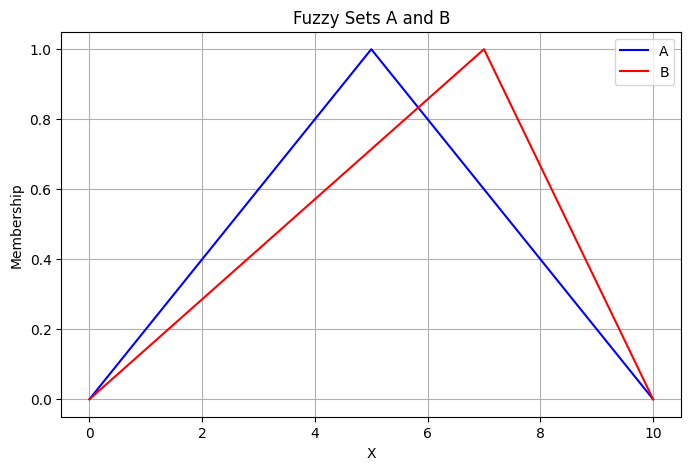

In [186]:
#Visualize fuzzy sets A and B
plt.figure(figsize = (8,5))
plt.plot(x,A,'b',linewidth = 1.5,label = 'A')
plt.plot(y,B,'r',linewidth = 1.5,label = 'B')
plt.title('Fuzzy Sets A and B')
plt.xlabel("X")
plt.ylabel("Membership")
plt.legend()
plt.grid(True)
plt.show()

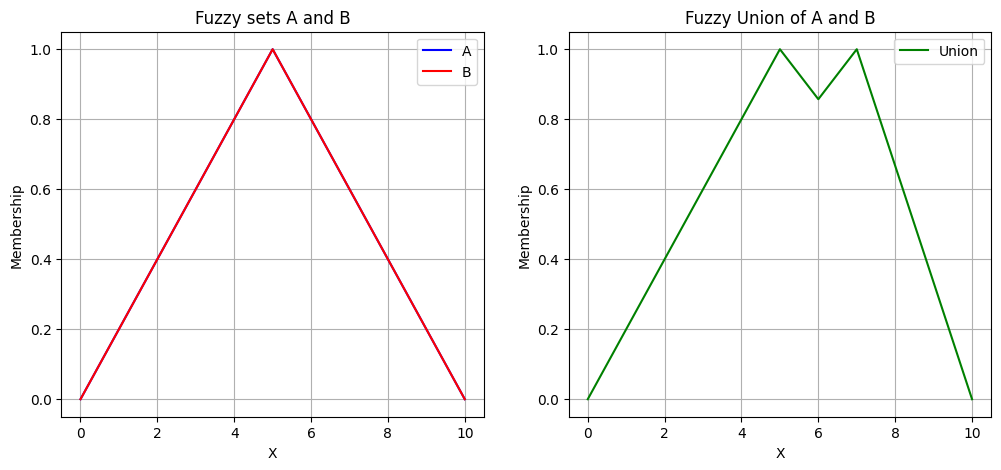

In [187]:
#Fuzzy union of A and B
union = fuzz.fuzzy_or(x,A,y,B)

#Visualize fuzzy union
fig,axes = plt.subplots(1,2,figsize = (12,5))

axes[0].plot(x,A,'b',linewidth = 1.5,label = "A")
axes[0].plot(x,A,'r',linewidth = 1.5,label = "B")
axes[0].set_title("Fuzzy sets A and B")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Membership")
axes[0].legend()
axes[0].grid()

axes[1].plot(x,union[1],'g',linewidth = 1.5,label = "Union")
axes[1].set_title('Fuzzy Union of A and B')
axes[1].set_xlabel("X")
axes[1].set_ylabel("Membership")
axes[1].legend()
axes[1].grid(True)

plt.show()

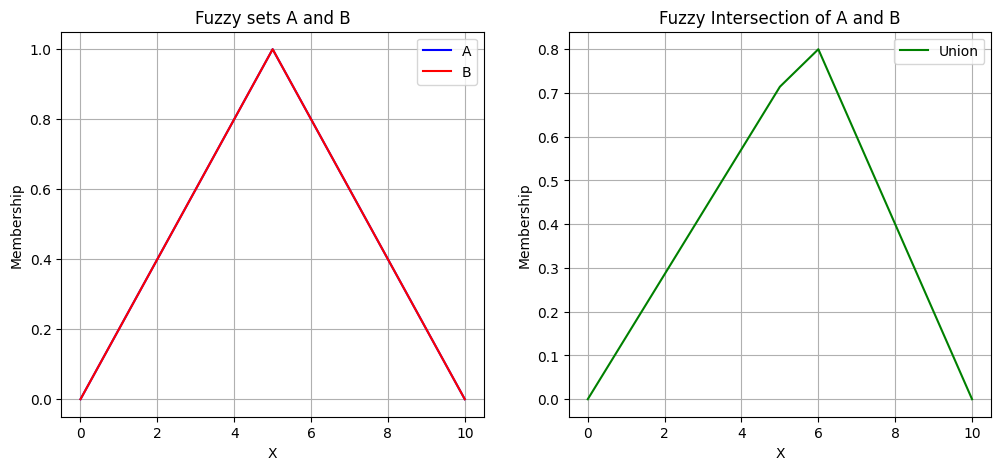

In [188]:
#Fuzzy intersection of A and B
union = fuzz.fuzzy_and(x,A,y,B)

#Visualize fuzzy union
fig,axes = plt.subplots(1,2,figsize = (12,5))

axes[0].plot(x,A,'b',linewidth = 1.5,label = "A")
axes[0].plot(x,A,'r',linewidth = 1.5,label = "B")
axes[0].set_title("Fuzzy sets A and B")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Membership")
axes[0].legend()
axes[0].grid()

axes[1].plot(x,union[1],'g',linewidth = 1.5,label = "Union")
axes[1].set_title('Fuzzy Intersection of A and B')
axes[1].set_xlabel("X")
axes[1].set_ylabel("Membership")
axes[1].legend()
axes[1].grid(True)

plt.show()

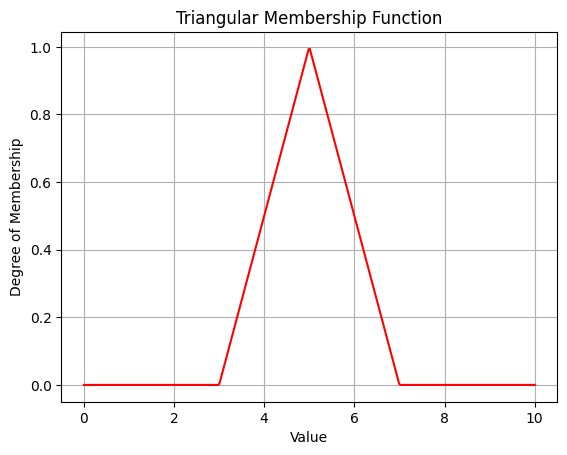

In [189]:
#Fuzzy membership function
def triangular_mf(x,a,b,c):
  return max(min((x - a) / (b - a), (c - x) / (c - b)), 0)

x = np.linspace(0, 10, 400)
y = [triangular_mf(i, 3, 5, 7) for i in x]

plt.plot(x,y,'r')
plt.title("Triangular Membership Function")
plt.xlabel("Value")
plt.ylabel("Degree of Membership")
plt.grid(True)
plt.show()

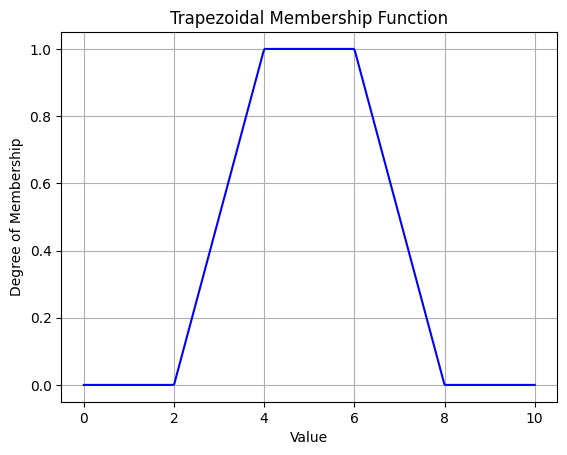

In [190]:
def trapezoidal_mf(x, a, b, c, d):
    return max(min((x - a) / (b - a), 1, (d - x) / (d - c)), 0)

y = [trapezoidal_mf(i, 2, 4, 6, 8) for i in x]

plt.plot(x, y, 'b')
plt.title("Trapezoidal Membership Function")
plt.xlabel("Value")
plt.ylabel("Degree of Membership")
plt.grid(True)
plt.show()

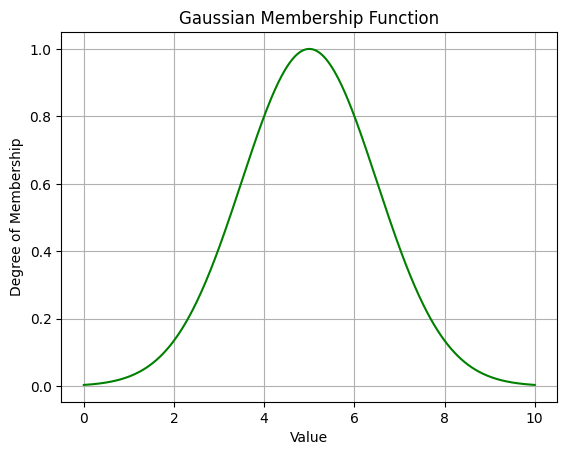

In [191]:
def gaussian_mf(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma) ** 2)

y = [gaussian_mf(i, 5, 1.5) for i in x]

plt.plot(x, y, 'g')
plt.title("Gaussian Membership Function")
plt.xlabel("Value")
plt.ylabel("Degree of Membership")
plt.grid(True)
plt.show()

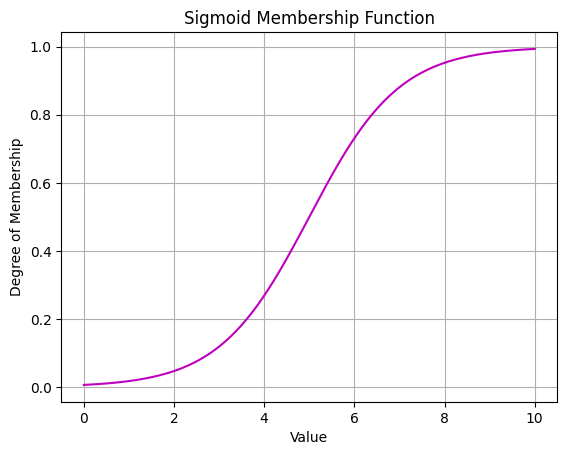

In [192]:
def sigmoid_mf(x, a, c):
    return 1 / (1 + np.exp(-a * (x - c)))

y = [sigmoid_mf(i, 1, 5) for i in x]

plt.plot(x, y, 'm')
plt.title("Sigmoid Membership Function")
plt.xlabel("Value")
plt.ylabel("Degree of Membership")
plt.grid(True)
plt.show()

In [193]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [194]:
# factors that determine the tip for a restaurant bill based on food quality and service
quality = ctrl.Antecedent(np.arange(0,11,1),'quality')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip  = ctrl.Consequent(np.arange(0,26,1),'tip')

In [195]:
# Membership functions for food quality
# Convert a scale of 0-10 to three fuzzy categories
quality['poor'] = fuzz.trimf(quality.universe,[0,0,5])
quality['average'] = fuzz.trimf(quality.universe,[0,5,10])
quality['high'] = fuzz.trimf(quality.universe,[5,10,10])

In [196]:
# Membership functions for service
# Convert a scale of 0-10 to three fuzzy categories
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

In [197]:
# Membership function for tip
# Three fuzzy categories converted to numerical values (i.e. how much to tip)
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

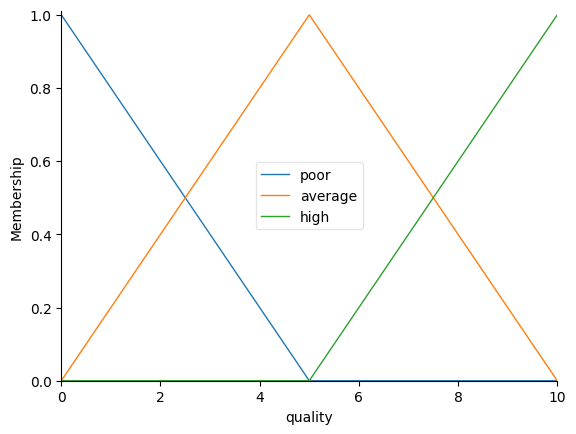

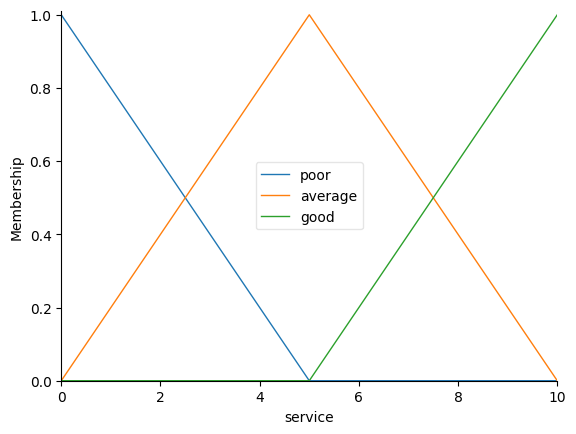

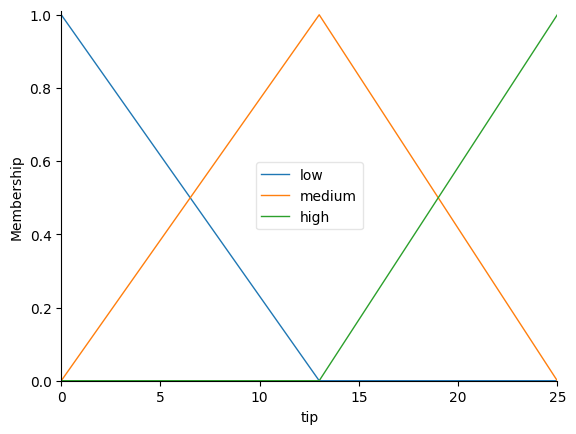

In [198]:
#Display the membership function
quality.view()
service.view()
tip.view()

In [199]:
rule1 = ctrl.Rule(quality['poor'] & service['poor'],tip['low'])
rule2 = ctrl.Rule(service['average'],tip['medium'])
rule3 = ctrl.Rule(service['good'] | service['good'],tip['high'])

In [200]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Recommended tip :  14.721311475409836


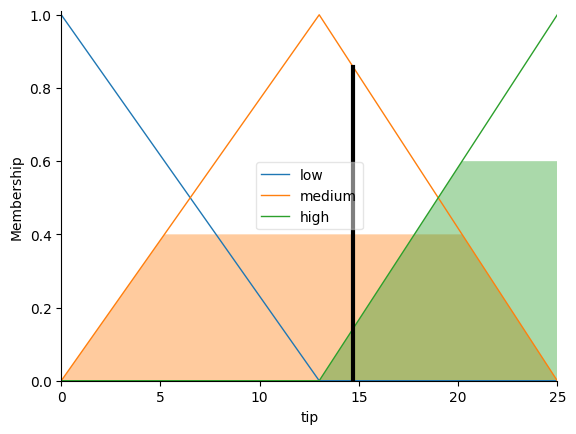

In [201]:
# Now run for one example : Restaurant A
# Input Value
tipping.input['quality'] = 6
tipping.input['service'] = 8

#Compute and view the result
tipping.compute()
print("Recommended tip : ",tipping.output['tip'])
tip.view(sim = tipping)

Recommended tip :  12.655555555555551


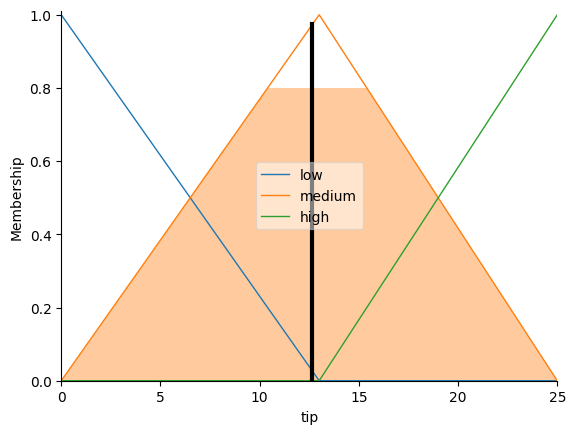

In [202]:
# Second example : Restaurant B
tipping.input['quality'] = 8
tipping.input['service'] = 4

#Compute and view the result
tipping.compute()
print("Recommended tip : ",tipping.output['tip'])
tip.view(sim = tipping)

In [203]:
# Exercise: introduce a new antecedent for the restaurant tipping system (i.e. Ambience).
# Antecedents: convert it into a 5-star scale; use a different membership function for each antecedent;
# Create a fuzzy rule base with minimum 9 rules.

import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [204]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
ambience = ctrl.Antecedent(np.arange(0, 6, 1), 'ambience')

tip = ctrl.Consequent(np.arange(0, 51, 1), 'tip')

In [205]:
#Membership functions for food quality
quality['poor'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['average'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['good'] = fuzz.trimf(quality.universe, [5, 10, 10])

In [206]:
#Membership function for service
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

In [207]:
ambience['very_poor'] = fuzz.trimf(ambience.universe, [0, 0, 1])
ambience['poor'] = fuzz.trimf(ambience.universe, [0, 1, 2])
ambience['average'] = fuzz.trimf(ambience.universe, [1, 2, 3])
ambience['good'] = fuzz.trimf(ambience.universe, [2, 3, 4])
ambience['excellent'] = fuzz.trimf(ambience.universe, [3, 4, 5])

In [208]:
#Membership function for review
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 15])
tip['medium'] = fuzz.trimf(tip.universe, [0, 15, 38])
tip['high'] = fuzz.trimf(tip.universe, [35, 50, 50])

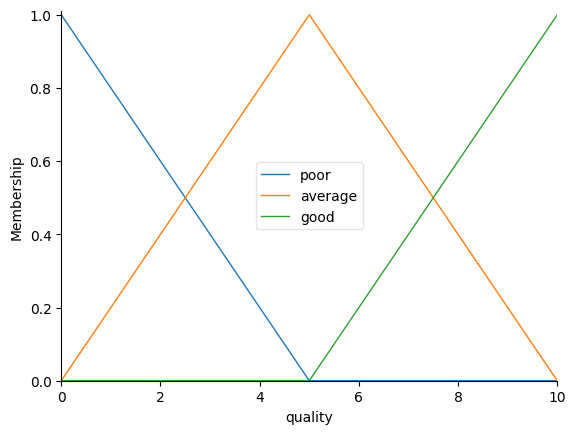

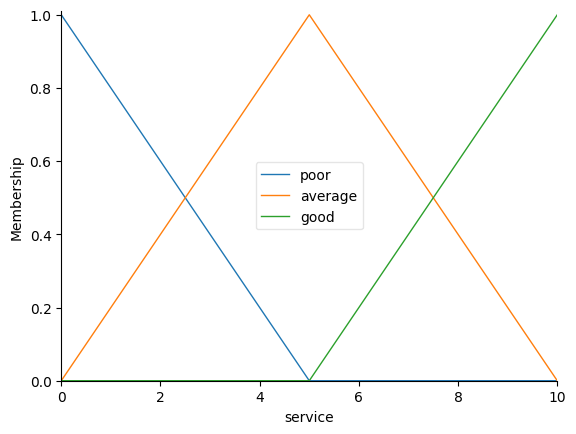

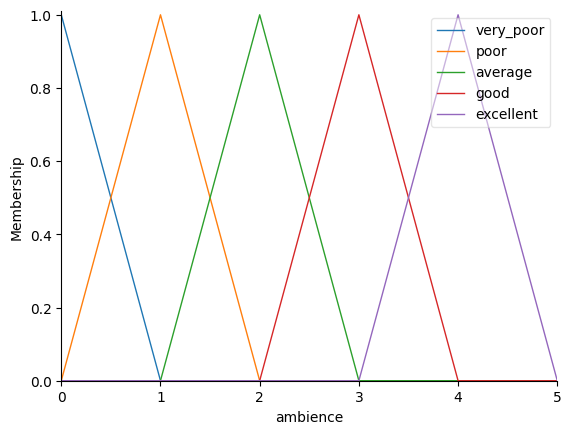

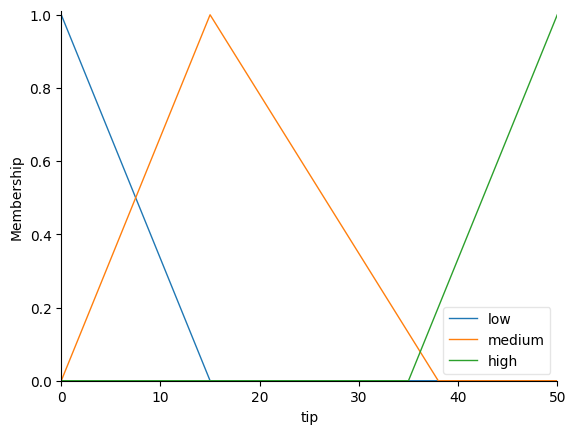

In [209]:
quality.view()
service.view()
ambience.view()
tip.view()

In [214]:
# Define Rules
rule1 = ctrl.Rule(quality['poor'] | service['poor'] | ambience['very_poor'], tip['low'])
rule2 = ctrl.Rule(quality['poor'] | service['poor'] | ambience['poor'], tip['low'])
rule3 = ctrl.Rule(quality['poor'] | service['poor'] | ambience['average'], tip['low'])

rule4 = ctrl.Rule(quality['average'] & service['average'] & ambience['average'], tip['medium'])
rule5 = ctrl.Rule(quality['average'] & service['poor'] & ambience['average'], tip['medium'])
rule6 = ctrl.Rule(quality['poor'] & service['average'] & ambience['average'], tip['medium'])
rule7 = ctrl.Rule(quality['poor'] & service['average'] & ambience['poor'], tip['medium'])

rule8 = ctrl.Rule(quality['good'] & service['good'] & ambience['average'], tip['high'])
rule9 = ctrl.Rule(quality['good'] & service['good'] & ambience['good'], tip['high'])
rule10 = ctrl.Rule(quality['good'] & service['average'] & ambience['excellent'], tip['high'])
rule11 = ctrl.Rule(quality['average'] & service['good'] & ambience['excellent'], tip['high'])
rule12 = ctrl.Rule(quality['good'] & service['good'] & ambience['excellent'], tip['high'])

In [215]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Recommended tip :  43.87500000000001


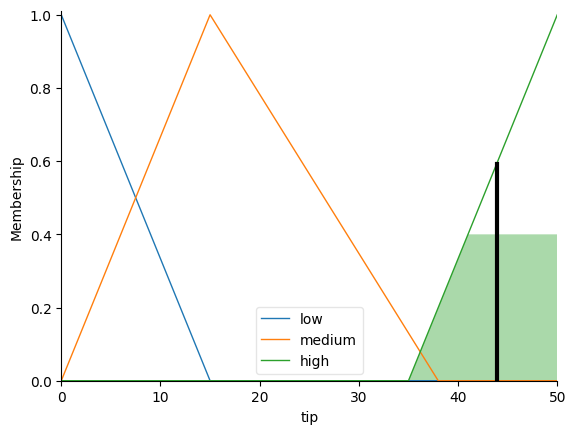

In [216]:
tipping.input['quality'] = 8
tipping.input['service'] = 7
tipping.input['ambience'] = 3

tipping.compute()
print("Recommended tip : ",tipping.output['tip'])
tip.view(sim = tipping)